In [ ]:
# Pin compatible versions
!pip -q install --upgrade "numpy<2.0" "scipy==1.11.4" "gensim==4.3.2"

# Force a clean restart so SciPy 2.x לא יישאר בזיכרון
import os, sys
print("Restarting runtime to load the pinned versions ...")
os.kill(os.getpid(), 9)


In [1]:
import numpy as np, scipy, gensim
print("NumPy:", np.__version__, "| SciPy:", scipy.__version__, "| gensim:", gensim.__version__)

import gensim.downloader as api
from gensim.models import KeyedVectors


NumPy: 1.26.4 | SciPy: 1.11.4 | gensim: 4.3.2


In [2]:
# עדיף שיהיה קאש מהורדה קודמת; אם לא, זה יוריד ~1.6GB
try:
    w2v = api.load("word2vec-google-news-300")
except Exception as e:
    print("gensim downloader failed, trying local binary:", e)
    LOCAL_BIN = "/content/drive/MyDrive/096222-project/GoogleNews-vectors-negative300.bin.gz"  # עדכני אם יש
    w2v = KeyedVectors.load_word2vec_format(LOCAL_BIN, binary=True)

print("Word2Vec loaded. vocab size:", len(w2v))


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec loaded. vocab size: 3000000


## Task 1.1:


In [4]:
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

--2025-08-13 13:03:43--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M  78.2MB/s    in 1.2s    

2025-08-13 13:03:45 (78.2 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
replace stimuli_180concepts.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import os, time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from google.colab import drive

# Mount (once)
drive.mount('/content/drive', force_remount=True)
BASE_DIR = "/content/drive/MyDrive/096222-project"   # עדכני לשביל שלך
os.makedirs(BASE_DIR, exist_ok=True)

# Utils from course
from learn_decoder import *  # read_matrix, learn_decoder


Mounted at /content/drive


In [4]:
X = read_matrix("imaging_data.csv", sep=",").astype(np.float32)
Y_glove = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ").astype(np.float32)
concepts = np.genfromtxt("stimuli_180concepts.txt", dtype="U")

print("fMRI:", X.shape, "GloVe:", Y_glove.shape, "concepts:", concepts.shape)

# בדיקות קצרות
assert X.shape[0] == Y_glove.shape[0] == concepts.shape[0] == 180, "rows must align (N=180)"

fMRI: (180, 170712) GloVe: (180, 300) concepts: (180,)


In [5]:
import numpy as np
import gensim.downloader as api

w2v = api.load("word2vec-google-news-300")

# 1) מסכה מי-במודל / מי-OOV
keep = np.array([w.lower() in w2v for w in concepts], dtype=bool)
missing = list(concepts[~keep])
print(f"OOV in Word2Vec: {len(missing)} → {sorted(missing)[:10]} ...")

# 2) בניית מטריצות מסוננות – ALL aligned
Y_w2v  = np.vstack([w2v[w.lower()] for w in concepts[keep]]).astype(np.float32)
X_sub  = X[keep]
Yg_sub = Y_glove[keep]
concepts_sub = concepts[keep]

print("Filtered:", X_sub.shape, Yg_sub.shape, Y_w2v.shape)
assert X_sub.shape[0] == Y_w2v.shape[0] == Yg_sub.shape[0], "rows must match after filtering"


OOV in Word2Vec: 1 → ['argumentatively'] ...
Filtered: (179, 170712) (179, 300) (179, 300)


In [9]:
import numpy as np

def mean_rank(decoded_vectors, true_vectors, true_indices):
    # Normalize the "true" matrix once
    tv = true_vectors / (np.linalg.norm(true_vectors, axis=1, keepdims=True) + 1e-8)
    ranks = []
    for dec, j in zip(decoded_vectors, true_indices):
        d = dec / (np.linalg.norm(dec) + 1e-8)
        sims = tv @ d
        r = 1 + np.sum(sims > sims[j] + 1e-12)  # lower is better
        ranks.append(int(r))
    return float(np.mean(ranks)), ranks


In [10]:
# === Cross-validated decoding routine (shared for both embeddings) ===
def cv_decode_mean_rank(X_fmri, Y_embed, n_splits=18, seed=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    fold_means = []
    for fold, (tr, te) in enumerate(kf.split(X_fmri), 1):
        W = learn_decoder(X_fmri[tr], Y_embed[tr])          # linear decoder
        Yhat = X_fmri[te] @ W
        mean_r, _ = mean_rank(Yhat, Y_embed, true_indices=te)
        fold_means.append(mean_r)
        print(f"Fold {fold:02d}: mean rank = {mean_r:.1f}")
    return np.array(fold_means)


In [11]:
# === Run CV for W2V and GloVe on the same subset ===
print("\nCV on Word2Vec …")
w2v_ranks = cv_decode_mean_rank(X_sub, Y_w2v,  n_splits=18, seed=42)

print("\nCV on GloVe …")
glove_ranks = cv_decode_mean_rank(X_sub, Yg_sub, n_splits=18, seed=42)

print("\nOverall mean rank — Word2Vec:", float(w2v_ranks.mean()))
print("Overall mean rank — GloVe   :", float(glove_ranks.mean()))



CV on Word2Vec …
Fold 01: mean rank = 54.2
Fold 02: mean rank = 43.7
Fold 03: mean rank = 38.7
Fold 04: mean rank = 60.3
Fold 05: mean rank = 75.3
Fold 06: mean rank = 67.9
Fold 07: mean rank = 57.5
Fold 08: mean rank = 77.6
Fold 09: mean rank = 68.8
Fold 10: mean rank = 66.2
Fold 11: mean rank = 63.6
Fold 12: mean rank = 48.8
Fold 13: mean rank = 62.5
Fold 14: mean rank = 45.2
Fold 15: mean rank = 60.8
Fold 16: mean rank = 51.6
Fold 17: mean rank = 73.2
Fold 18: mean rank = 59.8

CV on GloVe …
Fold 01: mean rank = 59.3
Fold 02: mean rank = 70.8
Fold 03: mean rank = 58.4
Fold 04: mean rank = 70.6
Fold 05: mean rank = 55.1
Fold 06: mean rank = 48.1
Fold 07: mean rank = 57.6
Fold 08: mean rank = 89.5
Fold 09: mean rank = 53.4
Fold 10: mean rank = 61.7
Fold 11: mean rank = 70.9
Fold 12: mean rank = 66.2
Fold 13: mean rank = 59.4
Fold 14: mean rank = 47.9
Fold 15: mean rank = 67.1
Fold 16: mean rank = 59.7
Fold 17: mean rank = 69.0
Fold 18: mean rank = 46.2

Overall mean rank — Word2Vec: 

Wilcoxon signed-rank (W2V<GloVe?): p=0.2613


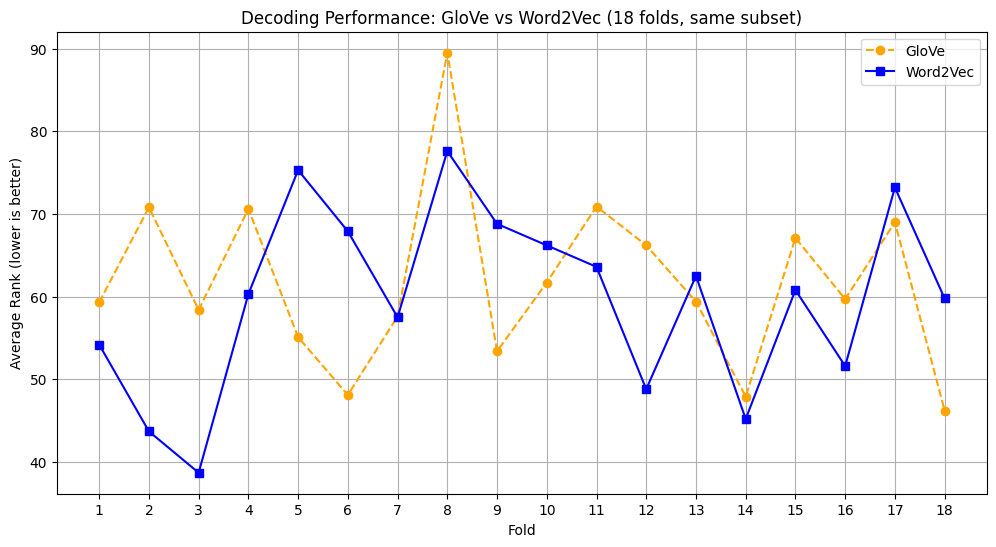

In [12]:
# === Statistics & plot ===
from scipy.stats import wilcoxon
stat, p = wilcoxon(w2v_ranks, glove_ranks, zero_method='wilcox', alternative='less')
print(f"Wilcoxon signed-rank (W2V<GloVe?): p={p:.4g}")

folds = np.arange(1, 19)
plt.figure(figsize=(12,6))
plt.plot(folds, glove_ranks, 'o--', label='GloVe',    color='orange')
plt.plot(folds, w2v_ranks,   's-',  label='Word2Vec', color='blue')
plt.xlabel("Fold"); plt.ylabel("Average Rank (lower is better)")
plt.title("Decoding Performance: GloVe vs Word2Vec (18 folds, same subset)")
plt.grid(True); plt.legend(); plt.xticks(folds)
plt.savefig(os.path.join(BASE_DIR, "w2v_vs_glove_decoding.png"), dpi=150)
plt.show()


*******************************************************************************************************************************************************************************************************************************************************************************************************************************************

## Task 1.3:


In [13]:
import os, pickle
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# --- Rank metric (lower is better) ---
def mean_rank(pred, cand):
    """
    pred: (N, D) predicted semantic vectors
    cand: (N, D) candidate vectors (row i is the true target for pred i)
    Returns: per-sample ranks (int), mean rank (float)
    """
    # cosine similarities, fully vectorized
    pred_n = pred / (np.linalg.norm(pred, axis=1, keepdims=True) + 1e-8)
    cand_n = cand / (np.linalg.norm(cand, axis=1, keepdims=True) + 1e-8)
    S = pred_n @ cand_n.T                       # (N x N)
    diag = np.diag(S)                           # similarity to the true target
    ranks = 1 + np.sum(S > (diag[:, None] + 1e-12), axis=1)  # 1-based rank
    return ranks.astype(int), float(np.mean(ranks))

def chance_mean_rank(n):  # expected rank under random guessing
    return (n + 1) / 2.0


In [14]:
# Adjust path to your Drive folder
DATA_DIR = "/content/drive/My Drive/Project 2: Word Embeddings and the Brain/Structured Task (sentence decoding)"

# EXP1 (concepts 180×V) for training the decoder
exp1_path = os.path.join(DATA_DIR, "neuralData_for_EXP1.csv")
# file format: first row/col are headers -> skip them
X_exp1 = pd.read_csv(exp1_path, header=None, skiprows=1).values[:, 1:].astype(np.float32)  # (180, 185866)

# GloVe for 180 concepts (targets for training)
Y_exp1 = pd.read_csv("/content/vectors_180concepts.GV42B300.txt", sep=r"\s+", header=None).values.astype(np.float32)  # (180, 300)

print("EXP1 shapes  | fMRI:", X_exp1.shape, "GloVe:", Y_exp1.shape)

# EXP2 (sentences 384×V) + GloVe
with open(os.path.join(DATA_DIR, "EXP2.pkl"), "rb") as f:
    exp2 = pickle.load(f)
X_a2 = exp2["Fmridata"].astype(np.float32)  # (384, V)
Y_a2 = pd.read_csv(os.path.join(DATA_DIR, "vectors_384sentences.GV42B300.average.txt"),
                   sep=r"\s+", header=None).values.astype(np.float32)  # (384, 300)

# EXP3 (sentences 243×V) + GloVe
with open(os.path.join(DATA_DIR, "EXP3.pkl"), "rb") as f:
    exp3 = pickle.load(f)
X_a3 = exp3["Fmridata"].astype(np.float32)  # (243, V)
Y_a3 = pd.read_csv(os.path.join(DATA_DIR, "vectors_243sentences.GV42B300.average.txt"),
                   sep=r"\s+", header=None).values.astype(np.float32)  # (243, 300)

print("EXP2 shapes  | fMRI:", X_a2.shape, "GloVe:", Y_a2.shape)
print("EXP3 shapes  | fMRI:", X_a3.shape, "GloVe:", Y_a3.shape)

# Quick sanity:
assert X_exp1.shape[0] == Y_exp1.shape[0] == 180
assert X_a2.shape[0]  == Y_a2.shape[0]   == 384
assert X_a3.shape[0]  == Y_a3.shape[0]   == 243
assert X_exp1.shape[1] == X_a2.shape[1] == X_a3.shape[1], "V must match across experiments"


EXP1 shapes  | fMRI: (180, 185866) GloVe: (180, 300)
EXP2 shapes  | fMRI: (384, 185866) GloVe: (384, 300)
EXP3 shapes  | fMRI: (243, 185866) GloVe: (243, 300)


In [15]:
# StandardScaler (per voxel) + Ridge; alpha can be tuned if you want
decoder = make_pipeline(
    StandardScaler(with_mean=True, with_std=True),
    Ridge(alpha=10.0, fit_intercept=True, random_state=42)
)
decoder.fit(X_exp1, Y_exp1)

# Save the whole model (not just the weight matrix)
DECODER_PATH = "/content/glove_decoder_exp1.pkl"
with open(DECODER_PATH, "wb") as f:
    pickle.dump(decoder, f)
print("Decoder saved to:", DECODER_PATH)


Decoder saved to: /content/glove_decoder_exp1.pkl


In [16]:
with open(DECODER_PATH, "rb") as f:
    decoder = pickle.load(f)

# Predict semantic vectors (includes scaling & intercept)
Yhat_a2 = decoder.predict(X_a2)  # (384, 300)
Yhat_a3 = decoder.predict(X_a3)  # (243, 300)

ranks_a2, mean_a2 = mean_rank(Yhat_a2, Y_a2)
ranks_a3, mean_a3 = mean_rank(Yhat_a3, Y_a3)

print(f"A2  mean rank: {mean_a2:.2f}   | chance ≈ {chance_mean_rank(len(ranks_a2)):.1f}")
print(f"A3  mean rank: {mean_a3:.2f}   | chance ≈ {chance_mean_rank(len(ranks_a3)):.1f}")


A2  mean rank: 165.93   | chance ≈ 192.5
A3  mean rank: 100.14   | chance ≈ 122.0


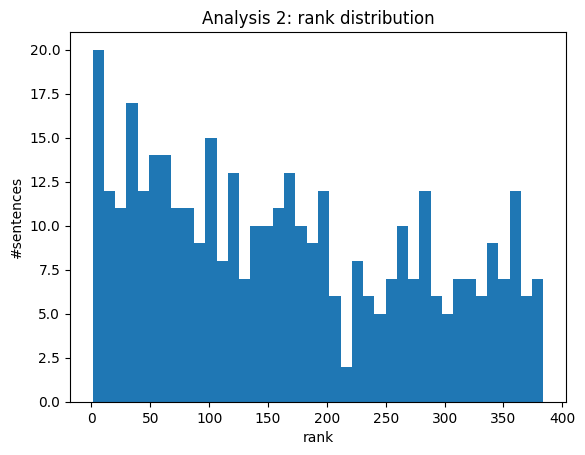

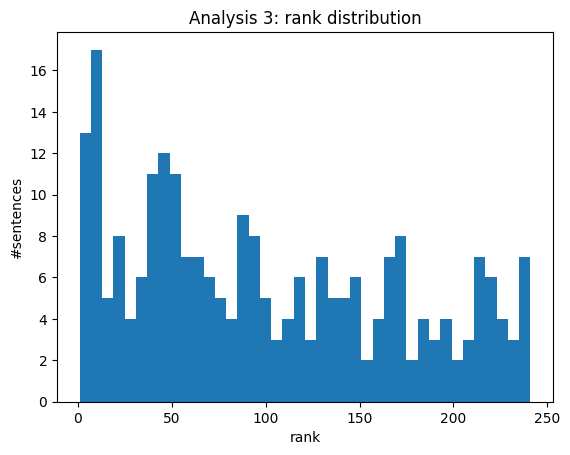

Saved /content/rank_results_task1_s3.txt


In [17]:
import matplotlib.pyplot as plt

plt.figure(); plt.hist(ranks_a2, bins=40); plt.title("Analysis 2: rank distribution"); plt.xlabel("rank"); plt.ylabel("#sentences"); plt.show()
plt.figure(); plt.hist(ranks_a3, bins=40); plt.title("Analysis 3: rank distribution"); plt.xlabel("rank"); plt.ylabel("#sentences"); plt.show()

with open("/content/rank_results_task1_s3.txt", "w") as f:
    f.write(f"A2 mean rank: {mean_a2:.2f} | chance ≈ {chance_mean_rank(len(ranks_a2)):.1f}\n")
    f.write(f"A3 mean rank: {mean_a3:.2f} | chance ≈ {chance_mean_rank(len(ranks_a3)):.1f}\n")
print("Saved /content/rank_results_task1_s3.txt")


**********************************************************************************************************************************************************************

## task 1.4:


In [18]:
# === Task 1 §4: Topic-wise analysis (A2 & A3) ===
import os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

# Paths
DATA_DIR = "/content/drive/My Drive/Project 2: Word Embeddings and the Brain/Structured Task (sentence decoding)"
DECODER_PATH = "/content/glove_decoder_exp1.pkl"   # change if you saved elsewhere in §3
OUT_DIR = "/content/drive/My Drive/096222-project"
os.makedirs(OUT_DIR, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Load Analysis 2 and 3 dicts (contain fMRI and topic labels)
with open(os.path.join(DATA_DIR, "EXP2.pkl"), "rb") as f:
    D2 = pickle.load(f)
with open(os.path.join(DATA_DIR, "EXP3.pkl"), "rb") as f:
    D3 = pickle.load(f)

X_a2 = D2["Fmridata"].astype(np.float32)   # (384, V)
X_a3 = D3["Fmridata"].astype(np.float32)   # (243, V)

print("fMRI A2:", X_a2.shape, "| fMRI A3:", X_a3.shape)


fMRI A2: (384, 185866) | fMRI A3: (243, 185866)


In [20]:
# Sentence GloVe matrices for A2 and A3
Y_a2 = pd.read_csv(
    os.path.join(DATA_DIR, "vectors_384sentences.GV42B300.average.txt"),
    sep=r"\s+", header=None
).values.astype(np.float32)   # (384, 300)

Y_a3 = pd.read_csv(
    os.path.join(DATA_DIR, "vectors_243sentences.GV42B300.average.txt"),
    sep=r"\s+", header=None
).values.astype(np.float32)   # (243, 300)

assert X_a2.shape[0] == Y_a2.shape[0] == 384
assert X_a3.shape[0] == Y_a3.shape[0] == 243

print("GloVe A2:", Y_a2.shape, "| GloVe A3:", Y_a3.shape)


GloVe A2: (384, 300) | GloVe A3: (243, 300)


In [21]:
# Load the full pipeline (StandardScaler + Ridge) saved in §3
with open(DECODER_PATH, "rb") as f:
    decoder = pickle.load(f)

decoder


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10.0, random_state=42))])

In [22]:
# Predict sentence embeddings for all sentences (A2, A3)
Yhat_a2 = decoder.predict(X_a2)   # (384, 300)
Yhat_a3 = decoder.predict(X_a3)   # (243, 300)

print("Predicted A2:", Yhat_a2.shape, "| Predicted A3:", Yhat_a3.shape)


Predicted A2: (384, 300) | Predicted A3: (243, 300)


In [23]:
def cosine_ranks(Yhat: np.ndarray, Ytrue: np.ndarray) -> np.ndarray:
    """
    Rank = 1 + number of items with higher cosine similarity to the predicted vector
    (global competition within the set).
    """
    Yhat_n = Yhat / (np.linalg.norm(Yhat, axis=1, keepdims=True) + 1e-8)
    Ytrue_n = Ytrue / (np.linalg.norm(Ytrue, axis=1, keepdims=True) + 1e-8)
    S = Yhat_n @ Ytrue_n.T               # (N, N) cosine similarities
    diag = np.diag(S)[:, None]           # similarity to its own true vector
    ranks = 1 + (S > diag).sum(axis=1)   # lower is better
    return ranks.astype(int)

def topics_from_pkl(D):
    """
    Build per-sentence topic names from the PKL structure.
    Handles 1-based indices and flattens arrays safely.
    """
    s2p = np.asarray(D["labelsPassageForEachSentence"]).ravel().astype(int) - 1  # sentence->passage
    p2t = np.asarray(D["labelsPassageCategory"]).ravel().astype(int) - 1         # passage->topic id
    topics = np.asarray(D["keyPassageCategory"]).ravel().astype(str)             # topic names

    assert s2p.min() >= 0 and s2p.max() < p2t.size, "sentence->passage out of bounds"
    topic_ids = p2t[s2p]                              # (N_sentences,)
    assert topic_ids.min() >= 0 and topic_ids.max() < topics.size, "passage->topic out of bounds"
    topic_names = topics[topic_ids]                   # (N_sentences,)
    return topic_ids, topic_names


In [24]:
# Per-sentence ranks (lower is better)
ranks_a2 = cosine_ranks(Yhat_a2, Y_a2)
ranks_a3 = cosine_ranks(Yhat_a3, Y_a3)

chance_a2 = (len(ranks_a2) + 1) / 2
chance_a3 = (len(ranks_a3) + 1) / 2

print(f"A2 mean rank = {ranks_a2.mean():.2f} | chance ≈ {chance_a2:.1f}")
print(f"A3 mean rank = {ranks_a3.mean():.2f} | chance ≈ {chance_a3:.1f}")


A2 mean rank = 165.93 | chance ≈ 192.5
A3 mean rank = 100.14 | chance ≈ 122.0


In [26]:
# --- robust topic extraction from the PKL dict (works for EXP2/EXP3) ---
import numpy as np

def topics_from_pkl(D):
    """
    Returns:
      topic_ids_per_sentence : (N_sentences,) int array in [0..T-1]
      topic_names_per_sentence : list[str] of length N_sentences
    """
    # sentence -> passage (1-based in the PKL)  ;  passage -> topic (1-based)
    s2p = np.asarray(D["labelsPassageForEachSentence"]).ravel().astype(int) - 1
    p2t = np.asarray(D["labelsPassageCategory"]).ravel().astype(int) - 1

    # keyPassageCategory is shape (1, 24) and each cell may itself be an array/list with a single string.
    raw_topics = D["keyPassageCategory"]
    if isinstance(raw_topics, np.ndarray):
        raw_topics = raw_topics.reshape(-1)  # flatten to (24,)
    topic_names = []
    for t in raw_topics:
        # unwrap nested arrays/lists like array(['Politics']) -> 'Politics'
        while isinstance(t, (np.ndarray, list)) and np.size(t) > 0:
            t = np.array(t).reshape(-1)[0]
        # decode bytes if needed
        if isinstance(t, bytes):
            t = t.decode("utf-8", errors="ignore")
        topic_names.append(str(t))

    # sanity checks
    assert s2p.min() >= 0 and s2p.max() < p2t.size, "sentence->passage out of bounds"
    assert p2t.min() >= 0 and p2t.max() < len(topic_names), "passage->topic out of bounds"

    # per-sentence topic ids and names
    topic_ids_per_sentence = p2t[s2p]
    topic_names_per_sentence = [topic_names[i] for i in topic_ids_per_sentence]
    return topic_ids_per_sentence, topic_names_per_sentence


In [27]:
# Topic names for each sentence
tid2, tname2 = topics_from_pkl(D2)
tid3, tname3 = topics_from_pkl(D3)

assert len(tname2) == len(ranks_a2) == 384
assert len(tname3) == len(ranks_a3) == 243

# Build dataframes and compute per-topic mean rank
df2 = pd.DataFrame({"rank": ranks_a2, "topic": tname2})
df3 = pd.DataFrame({"rank": ranks_a3, "topic": tname3})

mean_by_topic_a2 = df2.groupby("topic")["rank"].mean().sort_values()
mean_by_topic_a3 = df3.groupby("topic")["rank"].mean().sort_values()

best_a2,  worst_a2  = mean_by_topic_a2.index[0],  mean_by_topic_a2.index[-1]
best_a3,  worst_a3  = mean_by_topic_a3.index[0],  mean_by_topic_a3.index[-1]

print("A2 — mean rank by topic (lower is better):\n", mean_by_topic_a2, "\n")
print("A3 — mean rank by topic (lower is better):\n", mean_by_topic_a3, "\n")

print(f"A2 best  : {best_a2}  ({mean_by_topic_a2.iloc[0]:.2f})")
print(f"A2 worst : {worst_a2} ({mean_by_topic_a2.iloc[-1]:.2f})")
print(f"A3 best  : {best_a3}  ({mean_by_topic_a3.iloc[0]:.2f})")
print(f"A3 worst : {worst_a3} ({mean_by_topic_a3.iloc[-1]:.2f})")


A2 — mean rank by topic (lower is better):
 topic
body_part               72.4375
dwelling                80.5000
furniture               92.1875
human                   93.9375
building_part          119.2500
drink_non_alcoholic    137.1250
appliance              137.3125
tool                   158.8750
place                  160.2500
kitchen_utensil        167.5000
bird                   169.6875
weapon                 169.8125
animal                 175.0625
fish                   176.8125
disaster               177.8125
crime                  180.2500
music                  187.6875
clothing               193.8750
insect                 195.1250
vehicles_transport     195.4375
landscape              197.8125
fruit                  214.1875
profession             244.1875
vegetable              285.2500
Name: rank, dtype: float64 

A3 — mean rank by topic (lower is better):
 topic
dreams                42.500000
law_school            60.300000
opera                 61.000000
stress 

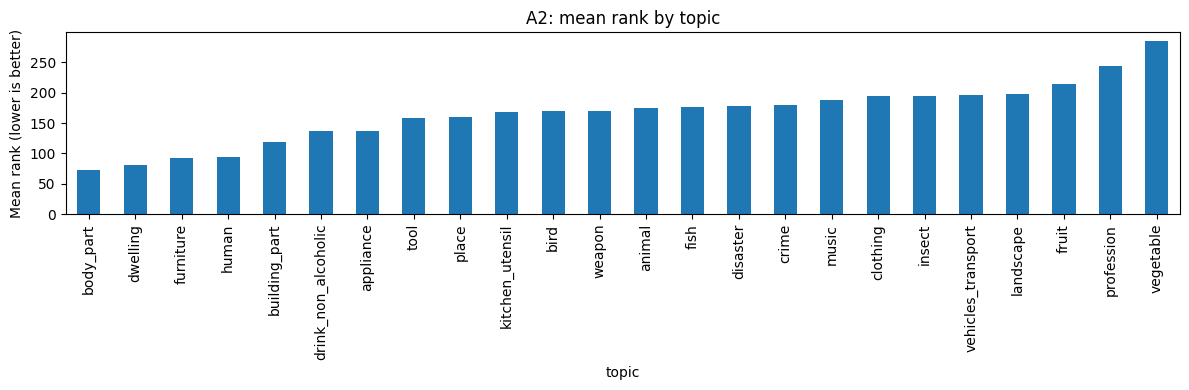

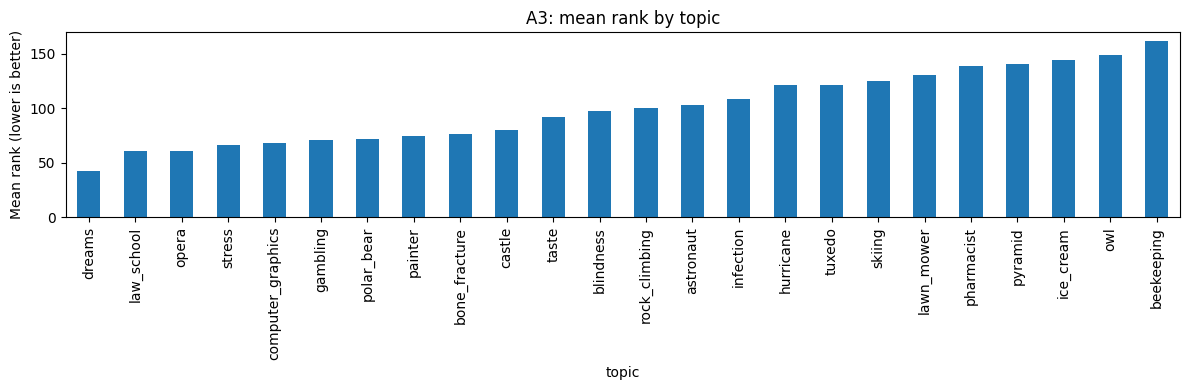

In [28]:
plt.figure(figsize=(12,4))
mean_by_topic_a2.plot(kind="bar")
plt.ylabel("Mean rank (lower is better)")
plt.title("A2: mean rank by topic")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "A2_mean_rank_by_topic.png"), dpi=150)
plt.show()

plt.figure(figsize=(12,4))
mean_by_topic_a3.plot(kind="bar")
plt.ylabel("Mean rank (lower is better)")
plt.title("A3: mean rank by topic")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "A3_mean_rank_by_topic.png"), dpi=150)
plt.show()


In [33]:
# QC: how many sentences per topic?
print("A2 counts per topic:\n", df2["topic"].value_counts().sort_index())
print("\nA3 counts per topic:\n", df3["topic"].value_counts().sort_index())


A2 counts per topic:
 topic
animal                 16
appliance              16
bird                   16
body_part              16
building_part          16
clothing               16
crime                  16
disaster               16
drink_non_alcoholic    16
dwelling               16
fish                   16
fruit                  16
furniture              16
human                  16
insect                 16
kitchen_utensil        16
landscape              16
music                  16
place                  16
profession             16
tool                   16
vegetable              16
vehicles_transport     16
weapon                 16
Name: count, dtype: int64

A3 counts per topic:
 topic
astronaut            10
beekeeping           11
blindness            10
bone_fracture        11
castle               10
computer_graphics    10
dreams               10
gambling             10
hurricane            10
ice_cream            10
infection            10
law_school           10
lawn_

In [34]:
# Effect size: improvement vs chance where chance = (N + 1) / 2
chance_a2 = (len(df2) + 1) / 2
chance_a3 = (len(df3) + 1) / 2

mean_by_topic_a2 = df2.groupby("topic")["rank"].mean()
mean_by_topic_a3 = df3.groupby("topic")["rank"].mean()

eff_a2 = (chance_a2 - mean_by_topic_a2).rename("improvement_vs_chance")
eff_a3 = (chance_a3 - mean_by_topic_a3).rename("improvement_vs_chance")

print("\nA2 improvement vs chance (top-5):\n", eff_a2.sort_values(ascending=False).head(5))
print("\nA3 improvement vs chance (top-5):\n", eff_a3.sort_values(ascending=False).head(5))



A2 improvement vs chance (top-5):
 topic
body_part        120.0625
dwelling         112.0000
furniture        100.3125
human             98.5625
building_part     73.2500
Name: improvement_vs_chance, dtype: float64

A3 improvement vs chance (top-5):
 topic
dreams               79.5
law_school           61.7
opera                61.0
stress               55.6
computer_graphics    54.1
Name: improvement_vs_chance, dtype: float64


In [35]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

def bh_fdr(pvals, alpha=0.05):
    p = np.asarray(pvals, float)
    m = p.size
    order = np.argsort(p)
    thresh = alpha * (np.arange(1, m+1) / m)
    passed = p[order] <= thresh
    if not np.any(passed):
        return np.zeros_like(p, dtype=bool)
    k = np.max(np.where(passed)[0])
    crit = thresh[k]
    return p <= crit

def topic_wilcoxon(df, chance):
    rows = []
    for topic, sub in df.groupby("topic"):
        # One-sided test: is median(chance - rank) > 0 ?
        diff = chance - sub["rank"].values
        stat, p = wilcoxon(diff, alternative="greater", zero_method="pratt", method="approx")
        rows.append((topic, len(sub), sub["rank"].mean(), diff.mean(), p))
    out = pd.DataFrame(rows, columns=["topic", "n", "mean_rank", "improvement_vs_chance", "p_wilcoxon_one_sided"])
    out["FDR_5%"] = bh_fdr(out["p_wilcoxon_one_sided"].values, alpha=0.05)
    return out.sort_values("p_wilcoxon_one_sided")

res_a2 = topic_wilcoxon(df2, chance_a2)
res_a3 = topic_wilcoxon(df3, chance_a3)

print("A2 significant topics after FDR 5%:\n", res_a2[res_a2["FDR_5%"]])
print("\nA3 significant topics after FDR 5%:\n", res_a3[res_a3["FDR_5%"]])


A2 significant topics after FDR 5%:
             topic   n  mean_rank  improvement_vs_chance  p_wilcoxon_one_sided  \
3       body_part  16    72.4375               120.0625              0.000387   
9        dwelling  16    80.5000               112.0000              0.000468   
12      furniture  16    92.1875               100.3125              0.001892   
13          human  16    93.9375                98.5625              0.003580   
4   building_part  16   119.2500                73.2500              0.004863   

    FDR_5%  
3     True  
9     True  
12    True  
13    True  
4     True  

A3 significant topics after FDR 5%:
                 topic   n  mean_rank  improvement_vs_chance  \
6              dreams  10       42.5                   79.5   
11         law_school  10       60.3                   61.7   
5   computer_graphics  10       67.9                   54.1   
13              opera  11       61.0                   61.0   
7            gambling  10       70.4         

/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [29]:
out_txt = os.path.join(OUT_DIR, "topic_analysis_task1_s4.txt")
with open(out_txt, "w") as f:
    f.write("A2 — mean rank by topic:\n")
    f.write(mean_by_topic_a2.to_string()); f.write("\n\n")
    f.write("A3 — mean rank by topic:\n")
    f.write(mean_by_topic_a3.to_string()); f.write("\n\n")
    f.write(f"A2 best  : {best_a2}  ({mean_by_topic_a2.iloc[0]:.2f})\n")
    f.write(f"A2 worst : {worst_a2} ({mean_by_topic_a2.iloc[-1]:.2f})\n")
    f.write(f"A3 best  : {best_a3}  ({mean_by_topic_a3.iloc[0]:.2f})\n")
    f.write(f"A3 worst : {worst_a3} ({mean_by_topic_a3.iloc[-1]:.2f})\n")

print("Saved:", out_txt)


Saved: /content/drive/My Drive/096222-project/topic_analysis_task1_s4.txt


*******************************************************************************************************************************************************************************************************************************************************

# task 2

In [36]:
# --- Task 2: Sentence decoding on A2 (GloVe vs BERT) ---

import os, pickle, time, numpy as np, pandas as pd
from google.colab import drive

import torch
from transformers import BertTokenizer, BertModel

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from scipy.stats import wilcoxon

# Reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
set_seed(42)

# Mount & paths
drive.mount('/content/drive')
DATA_DIR = "/content/drive/My Drive/Project 2: Word Embeddings and the Brain/Structured Task (sentence decoding)"
RESULTS_DIR = "/content/drive/My Drive/096222-project"
os.makedirs(RESULTS_DIR, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Device: cpu


In [37]:
# fMRI (A2)
with open(os.path.join(DATA_DIR, "EXP2.pkl"), "rb") as f:
    D2 = pickle.load(f)
X = D2["Fmridata"].astype(np.float32)             # (384, 185866)

# GloVe sentence embeddings (A2)
Y_glove = pd.read_csv(
    os.path.join(DATA_DIR, "vectors_384sentences.GV42B300.average.txt"),
    sep=r"\s+", header=None
).values.astype(np.float32)                       # (384, 300)

# The raw sentences for BERT
with open(os.path.join(DATA_DIR, "stimuli_384sentences.txt"), "r", encoding="utf-8") as f:
    sentences = [ln.strip() for ln in f]

# sanity
assert X.shape[0] == 384 == Y_glove.shape[0] == len(sentences)
print("A2 shapes | fMRI:", X.shape, "| GloVe:", Y_glove.shape, "| sentences:", len(sentences))


A2 shapes | fMRI: (384, 185866) | GloVe: (384, 300) | sentences: 384


In [38]:
# Will save/load BERT [CLS] embeddings here
BERT_CACHE = os.path.join(RESULTS_DIR, "a2_bert_cls_384.npy")

def get_bert_cls(sentences, batch_size=32, model_name="bert-base-uncased"):
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name).to(device)
    model.eval()

    out = []
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i+batch_size]
        enc = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
        with torch.no_grad():
            h = model(**enc).last_hidden_state[:, 0, :]   # [CLS]
        out.append(h.cpu().numpy())
    return np.concatenate(out, axis=0).astype(np.float32)

if os.path.exists(BERT_CACHE):
    Y_bert = np.load(BERT_CACHE)
    print("Loaded cached BERT embeddings:", Y_bert.shape)
else:
    Y_bert = get_bert_cls(sentences, batch_size=32)
    np.save(BERT_CACHE, Y_bert)
    print("Computed & cached BERT embeddings:", Y_bert.shape)

# sanity
assert Y_bert.shape[0] == X.shape[0]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Computed & cached BERT embeddings: (384, 768)


In [39]:
def cosine_ranks(decoded, reference, true_indices):
    """
    decoded:   (N_te, D) predicted sentence embeddings
    reference: (N_all, D) candidate sentence embeddings (we use ALL 384 here)
    true_indices: original indices of the test rows (into 'reference')

    Returns: ranks (lower is better)
    """
    # Normalize once for cosine similarity
    ref = reference / (np.linalg.norm(reference, axis=1, keepdims=True) + 1e-8)
    dec = decoded   / (np.linalg.norm(decoded,   axis=1, keepdims=True) + 1e-8)

    sims = dec @ ref.T                              # (N_te, N_all)
    order = np.argsort(-sims, axis=1)               # desc
    # Rank of the true index in each row
    ranks = np.empty(decoded.shape[0], dtype=np.int32)
    for i, idx in enumerate(true_indices):
        # position of the true index in the sorted list
        ranks[i] = int(np.where(order[i] == idx)[0][0]) + 1
    return ranks

def cv_decode_mean_rank(X, Y_embed, n_splits=8, seed=42, alpha=1000.0):
    """
    K-fold CV. Each fold: fit (Imputer+Scaler+Ridge) on train, predict on test,
    compute rank against ALL 384 candidates (ALL-REF).

    Returns: ranks_per_sentence (length N), mean_rank
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

    # Prepare output
    ranks_all = np.empty(X.shape[0], dtype=np.int32)

    for fold, (tr, te) in enumerate(kf.split(X), 1):
        pipe = make_pipeline(
            SimpleImputer(strategy="mean"),
            StandardScaler(with_mean=True, with_std=True),
            Ridge(alpha=alpha, fit_intercept=True, random_state=seed)
        )
        pipe.fit(X[tr], Y_embed[tr])
        Yhat = pipe.predict(X[te])

        ranks = cosine_ranks(Yhat, Y_embed, true_indices=te)
        ranks_all[te] = ranks
        print(f"Fold {fold:02d}/{n_splits}: mean rank = {ranks.mean():.1f}")

    return ranks_all, float(np.mean(ranks_all))


In [40]:
# Alphas you can tweak; 1e3–1e4 worked well אצלך גם ב-Task 3
ALPHA_GLOVE = 3e3
ALPHA_BERT  = 1e4

print("\nCV on GloVe …")
r_glove, mean_glove = cv_decode_mean_rank(X, Y_glove, n_splits=8, seed=42, alpha=ALPHA_GLOVE)

print("\nCV on BERT …")
r_bert,  mean_bert  = cv_decode_mean_rank(X, Y_bert,  n_splits=8, seed=42, alpha=ALPHA_BERT)

print("\nOverall mean rank — GloVe:", mean_glove)
print("Overall mean rank — BERT :", mean_bert)

# Optional: paired Wilcoxon (lower ranks are better)
try:
    stat, p = wilcoxon(r_bert, r_glove, alternative="less")  # "less": BERT < GloVe ?
    print(f"\nWilcoxon signed-rank (BERT < GloVe?): p={p:.4f}")
except Exception as e:
    print("Wilcoxon failed:", e)



CV on GloVe …
Fold 01/8: mean rank = 71.5
Fold 02/8: mean rank = 90.8
Fold 03/8: mean rank = 78.0
Fold 04/8: mean rank = 84.4
Fold 05/8: mean rank = 57.4
Fold 06/8: mean rank = 61.4
Fold 07/8: mean rank = 83.8
Fold 08/8: mean rank = 46.3

CV on BERT …
Fold 01/8: mean rank = 70.1
Fold 02/8: mean rank = 107.8
Fold 03/8: mean rank = 70.3
Fold 04/8: mean rank = 65.0
Fold 05/8: mean rank = 69.4
Fold 06/8: mean rank = 65.6
Fold 07/8: mean rank = 116.6
Fold 08/8: mean rank = 59.6

Overall mean rank — GloVe: 71.7109375
Overall mean rank — BERT : 78.0625

Wilcoxon signed-rank (BERT < GloVe?): p=0.8156


Saved to: /content/drive/My Drive/096222-project


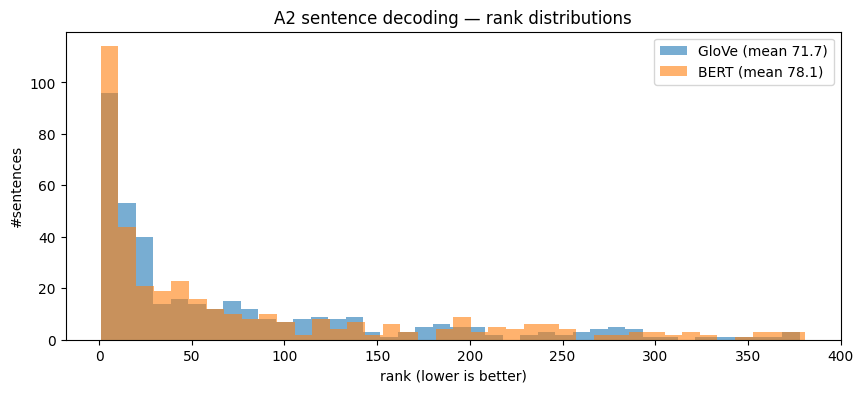

In [41]:
# Save ranks
np.save(os.path.join(RESULTS_DIR, "task2_ranks_glove.npy"), r_glove)
np.save(os.path.join(RESULTS_DIR, "task2_ranks_bert.npy"),  r_bert)

with open(os.path.join(RESULTS_DIR, "task2_results.txt"), "w") as f:
    f.write(f"Mean rank (GloVe): {mean_glove:.3f}\n")
    f.write(f"Mean rank (BERT): {mean_bert:.3f}\n")

print("Saved to:", RESULTS_DIR)

# (optional) simple plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.hist(r_glove, bins=40, alpha=0.6, label=f"GloVe (mean {mean_glove:.1f})")
plt.hist(r_bert,  bins=40, alpha=0.6, label=f"BERT (mean {mean_bert:.1f})")
plt.xlabel("rank (lower is better)"); plt.ylabel("#sentences")
plt.title("A2 sentence decoding — rank distributions")
plt.legend(); plt.show()


***********************************************************************************************************************************************************************

# Task 3

In [13]:
import os, pickle, random
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

import torch
from transformers import BertTokenizer, BertModel

def set_global_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
set_global_seed(42)

# set your base path
data_dir = "/content/drive/My Drive/Project 2: Word Embeddings and the Brain/Structured Task (sentence decoding)"

In [14]:
# fMRI (384, ~185866)
with open(os.path.join(data_dir, "EXP2.pkl"), "rb") as f:
    exp2_data = pickle.load(f)
fmri_data_a2 = np.asarray(exp2_data["Fmridata"], dtype=np.float32)

# GloVe (384, 300)
glove_path = os.path.join(data_dir, "vectors_384sentences.GV42B300.average.txt")
glove_sentence_vectors_a2 = pd.read_csv(glove_path, sep=r"\s+", header=None).values.astype(np.float32)

# sentences file (384 lines)
sent_path = os.path.join(data_dir, "stimuli_384sentences.txt")
with open(sent_path, "r", encoding="utf-8") as f:
    sentences_a2 = [ln.strip() for ln in f]

# BERT embeddings (compute once on CPU; אפשר לשמור/לטעון .npy כדי לא להוריד שוב)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased").eval()
device = "cuda" if torch.cuda.is_available() else "cpu"; model.to(device)

def get_bert_embeddings(sentences, batch_size=32, max_length=128):
    embs = []
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=max_length)
        inputs = {k:v.to(device) for k,v in inputs.items()}
        with torch.no_grad():
            out = model(**inputs).last_hidden_state[:,0,:].cpu().numpy()
        embs.append(out)
    return np.concatenate(embs, axis=0).astype(np.float32)

bert_sentence_vectors_a2 = get_bert_embeddings(sentences_a2)  # (384, 768)

# impute NaNs in fMRI
fmri_data_a2 = SimpleImputer(strategy="mean").fit_transform(fmri_data_a2).astype(np.float32)


In [15]:
def to_str_list_from_matlike(arr):
    flat = np.asarray(arr).reshape(-1)
    out = []
    for x in flat:
        if isinstance(x, (list, tuple, np.ndarray)): x = x[0]
        if isinstance(x, (bytes, bytearray)): x = x.decode("utf-8", errors="ignore")
        out.append(str(x).strip())
    return out

fmri_sentences = to_str_list_from_matlike(exp2_data["keySentences"])

def norm(s): return " ".join(s.lower().split())
fmri_norm  = [norm(s) for s in fmri_sentences]
file_norm  = [norm(s) for s in sentences_a2]

from collections import defaultdict, deque
idxs = defaultdict(deque)
for j,s in enumerate(file_norm): idxs[s].append(j)

perm, missing = [], []
for i,s in enumerate(fmri_norm):
    if idxs[s]: perm.append(idxs[s].popleft())
    else: missing.append((i,fmri_sentences[i]))

print(f"Matched {len(perm)}/384")
if missing: raise RuntimeError(f"Unmatched: {missing[:5]}")

glove_sentence_vectors_a2 = glove_sentence_vectors_a2[perm]
bert_sentence_vectors_a2  = bert_sentence_vectors_a2[perm]
print("Embeddings aligned to fMRI row order.")


Matched 384/384
Embeddings aligned to fMRI row order.


In [16]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

def make_splits(n_samples, n_splits=5, seed=42):
    return list(KFold(n_splits=n_splits, shuffle=True, random_state=seed).split(np.arange(n_samples)))

def prepare_cv_cache_for_X(
    X_embeds, splits, alpha=10.0, scale_X=True, dtype=np.float32,
    precompute_inverse=True, add_bias=True, penalize_bias=False,
    pca_components=None, pca_random_state=42
):
    from sklearn.decomposition import PCA
    X = X_embeds.astype(dtype, copy=False)
    cache = []
    for (tr,te) in splits:
        Xtr, Xte = X[tr], X[te]
        if scale_X:
            xs = StandardScaler().fit(Xtr)
            Xtr = xs.transform(Xtr).astype(dtype, copy=False)
            Xte = xs.transform(Xte).astype(dtype, copy=False)
        if pca_components is not None:
            pca = PCA(n_components=pca_components, random_state=pca_random_state)
            Xtr = pca.fit_transform(Xtr).astype(dtype, copy=False)
            Xte = pca.transform(Xte).astype(dtype, copy=False)
        if add_bias:
            Xtr = np.hstack([Xtr, np.ones((Xtr.shape[0],1), dtype=dtype)])
            Xte = np.hstack([Xte, np.ones((Xte.shape[0],1), dtype=dtype)])

        Xt = Xtr.T
        D  = Xtr.shape[1]
        I  = np.eye(D, dtype=dtype)
        if add_bias and not penalize_bias: I[-1,-1] = 0.0  # do not penalize intercept
        A  = Xt @ Xtr + alpha * I
        fold = {"tr": tr, "te": te, "Xtr_T": Xt, "Xte": Xte, "A": A}
        if precompute_inverse: fold["A_inv"] = np.linalg.inv(A)
        cache.append(fold)
    return cache

def cv_r2_with_cache(Y_fmri, cache, chunk_vox=2000, scale_Y=False, dtype=np.float32,
                     verbose=True, tot_ref="train"):
    Y = Y_fmri.astype(dtype, copy=False)
    _, V = Y.shape
    r2_sum = np.zeros(V, dtype=dtype); r2_cnt = np.zeros(V, np.int32)
    for i,fold in enumerate(cache,1):
        tr, te = fold["tr"], fold["te"]
        Xtr_T, Xte = fold["Xtr_T"], fold["Xte"]
        A, A_inv   = fold["A"], fold.get("A_inv")
        Ytr, Yte = Y[tr], Y[te]
        if scale_Y:
            ym = Ytr.mean(0, keepdims=True); ys = Ytr.std(0, keepdims=True) + 1e-8
            Ytr = (Ytr-ym)/ys; Yte = (Yte-ym)/ys
        for s in range(0,V,chunk_vox):
            e = min(s+chunk_vox, V)
            B = Xtr_T @ Ytr[:,s:e]
            W = (A_inv @ B) if A_inv is not None else np.linalg.solve(A,B)
            Yhat = Xte @ W
            yref = Ytr[:,s:e].mean(0, keepdims=True) if tot_ref=="train" else Yte[:,s:e].mean(0, keepdims=True)
            ss_res = ((Yte[:,s:e]-Yhat)**2).sum(0)
            ss_tot = ((Yte[:,s:e]-yref)**2).sum(0)
            r2_sum[s:e] += 1.0 - ss_res/np.maximum(ss_tot, 1e-12)
            r2_cnt[s:e] += 1
        if verbose: print(f"Observed fold {i}/{len(cache)} done.")
    return r2_sum/np.maximum(r2_cnt,1)

def permutation_pvalues_r2_cv_fast(Y_fmri, r2_obs, cache, n_perm=100, seed=42, topk=20000,
                                   chunk_vox=2000, scale_Y=False, dtype=np.float32,
                                   verbose=True, progress_every=10, tot_ref="train"):
    rng = np.random.default_rng(seed)
    Y = Y_fmri.astype(dtype, copy=False)
    N, V = Y.shape
    vox_sel = np.argsort(r2_obs)[-topk:] if (topk is not None and topk < V) else np.arange(V)
    ge = np.zeros(V, np.int32)
    import time; start=time.time()
    for p in range(n_perm):
        perm = rng.permutation(N)
        for fold in cache:
            tr, te = fold["tr"], fold["te"]
            Xtr_T, Xte = fold["Xtr_T"], fold["Xte"]
            A, A_inv = fold["A"], fold.get("A_inv")
            Ytr, Yte = Y[perm][tr], Y[perm][te]
            if scale_Y:
                ym = Ytr.mean(0, keepdims=True); ys = Ytr.std(0, keepdims=True)+1e-8
                Ytr=(Ytr-ym)/ys; Yte=(Yte-ym)/ys
            for s in range(0, vox_sel.size, chunk_vox):
                ch = vox_sel[s:s+chunk_vox]
                B  = Xtr_T @ Ytr[:,ch]
                W  = (A_inv @ B) if A_inv is not None else np.linalg.solve(A,B)
                Yhat = Xte @ W
                yref = Ytr[:,ch].mean(0, keepdims=True) if tot_ref=="train" else Yte[:,ch].mean(0, keepdims=True)
                ss_res = ((Yte[:,ch]-Yhat)**2).sum(0)
                ss_tot = ((Yte[:,ch]-yref)**2).sum(0)
                r2_perm = 1.0 - ss_res/np.maximum(ss_tot, 1e-12)
                ge[ch] += (r2_perm >= r2_obs[ch])
        if verbose and (p+1) % max(1, n_perm//(100//progress_every or 1)) == 0:
            el=time.time()-start; done=p+1; eta=el/done*(n_perm-done)
            print(f"Permutation {done}/{n_perm} | elapsed {el/60:.1f}m | ETA {eta/60:.1f}m")
    pvals = np.ones(V, np.float64)
    pvals[vox_sel] = (1 + ge[vox_sel]) / (n_perm + 1)
    return pvals

def benjamini_hochberg(pvals, alpha=0.05):
    p = np.asarray(pvals, float); V = p.size
    order = np.argsort(p); ranked = p[order]
    thresh = alpha * (np.arange(1, V+1) / V)
    passed = ranked <= thresh
    if not np.any(passed): return np.zeros_like(p, bool)
    k = np.max(np.where(passed)[0]); crit = thresh[k]
    return p <= crit

def safe_mean(arr, mask): return float(np.mean(arr[mask])) if np.any(mask) else float("nan")


In [17]:
splits_a2 = make_splits(fmri_data_a2.shape[0], n_splits=5, seed=42)

cache_glove = prepare_cv_cache_for_X(
    glove_sentence_vectors_a2, splits_a2,
    alpha=2782.559402207126, scale_X=True, add_bias=True, penalize_bias=False,
    precompute_inverse=True, dtype=np.float32
)
cache_bert  = prepare_cv_cache_for_X(
    bert_sentence_vectors_a2,  splits_a2,
    alpha=10000.0,             scale_X=True, add_bias=True, penalize_bias=False,
    precompute_inverse=True, dtype=np.float32
)

r2_glove = cv_r2_with_cache(fmri_data_a2, cache_glove, chunk_vox=2000, scale_Y=False, tot_ref="train")
r2_bert  = cv_r2_with_cache(fmri_data_a2, cache_bert,  chunk_vox=2000, scale_Y=False, tot_ref="train")
print("mean R² (train-ref) — GloVe:", float(np.mean(r2_glove)))
print("mean R² (train-ref) — BERT :", float(np.mean(r2_bert)))


Observed fold 1/5 done.
Observed fold 2/5 done.
Observed fold 3/5 done.
Observed fold 4/5 done.
Observed fold 5/5 done.
Observed fold 1/5 done.
Observed fold 2/5 done.
Observed fold 3/5 done.
Observed fold 4/5 done.
Observed fold 5/5 done.
mean R² (train-ref) — GloVe: 0.01322011098647425
mean R² (train-ref) — BERT : 0.013545465527789364


In [18]:
# smoke test
p_glove = permutation_pvalues_r2_cv_fast(fmri_data_a2, r2_glove, cache_glove,
    n_perm=20, seed=42, topk=5000, chunk_vox=4000, scale_Y=False, tot_ref="train")
p_bert  = permutation_pvalues_r2_cv_fast(fmri_data_a2, r2_bert,  cache_bert,
    n_perm=20, seed=42, topk=5000, chunk_vox=4000, scale_Y=False, tot_ref="train")

# (אופציונלי) ריצה מלאה – שימי לב לזמן
# p_glove = permutation_pvalues_r2_cv_fast(... n_perm=200, topk=50000, ...)
# p_bert  = permutation_pvalues_r2_cv_fast(... n_perm=100, topk=20000, ...)

sig_glove = benjamini_hochberg(p_glove, 0.05)
sig_bert  = benjamini_hochberg(p_bert,  0.05)

print(f"[GloVe] sig@FDR5%: {int(sig_glove.sum())} | mean R²(sig): {safe_mean(r2_glove, sig_glove):.4f} | mean R²(all): {np.mean(r2_glove):.4f}")
print(f"[BERT ] sig@FDR5%: {int(sig_bert.sum())}  | mean R²(sig): {safe_mean(r2_bert,  sig_bert):.4f}  | mean R²(all): {np.mean(r2_bert):.4f}")

# save (recommended)
np.save("r2_glove_trainref.npy", r2_glove); np.save("r2_bert_trainref.npy", r2_bert)
np.save("p_glove_trainref.npy", p_glove);   np.save("p_bert_trainref.npy",  p_bert)


Permutation 2/20 | elapsed 0.3m | ETA 3.1m
Permutation 4/20 | elapsed 0.7m | ETA 2.7m
Permutation 6/20 | elapsed 1.0m | ETA 2.4m
Permutation 8/20 | elapsed 1.3m | ETA 2.0m
Permutation 10/20 | elapsed 1.7m | ETA 1.7m
Permutation 12/20 | elapsed 2.0m | ETA 1.3m
Permutation 14/20 | elapsed 2.3m | ETA 1.0m
Permutation 16/20 | elapsed 2.7m | ETA 0.7m
Permutation 18/20 | elapsed 3.0m | ETA 0.3m
Permutation 20/20 | elapsed 3.3m | ETA 0.0m
Permutation 2/20 | elapsed 0.3m | ETA 3.1m
Permutation 4/20 | elapsed 0.7m | ETA 2.7m
Permutation 6/20 | elapsed 1.0m | ETA 2.4m
Permutation 8/20 | elapsed 1.3m | ETA 2.0m
Permutation 10/20 | elapsed 1.7m | ETA 1.7m
Permutation 12/20 | elapsed 2.0m | ETA 1.3m
Permutation 14/20 | elapsed 2.3m | ETA 1.0m
Permutation 16/20 | elapsed 2.6m | ETA 0.7m
Permutation 18/20 | elapsed 2.9m | ETA 0.3m
Permutation 20/20 | elapsed 3.2m | ETA 0.0m
[GloVe] sig@FDR5%: 0 | mean R²(sig): nan | mean R²(all): 0.0132
[BERT ] sig@FDR5%: 0  | mean R²(sig): nan  | mean R²(all): 0.013

In [19]:
# --- Final permutations + FDR (train-referenced R², bias not penalized) ---

# 1) Run permutations
p_glove = permutation_pvalues_r2_cv_fast(
    fmri_data_a2, r2_glove, cache_glove,
    n_perm=200, seed=42, topk=50000,   # אפשר להקטין/להגדיל לפי משאבים
    chunk_vox=8000, scale_Y=False, tot_ref="train",
    dtype=np.float32, verbose=True
)

p_bert  = permutation_pvalues_r2_cv_fast(
    fmri_data_a2, r2_bert,  cache_bert,
    n_perm=100, seed=42, topk=20000,
    chunk_vox=8000, scale_Y=False, tot_ref="train",
    dtype=np.float32, verbose=True
)

# 2) FDR (Benjamini–Hochberg) + summary
def benjamini_hochberg(pvals, alpha=0.05):
    p = np.asarray(pvals, float); V = p.size
    order = np.argsort(p); ranked = p[order]
    thresh = alpha * (np.arange(1, V+1) / V)
    passed = ranked <= thresh
    if not np.any(passed): return np.zeros_like(p, bool)
    k = np.max(np.where(passed)[0]); crit = thresh[k]
    return p <= crit

def safe_mean(arr, mask): return float(np.mean(arr[mask])) if np.any(mask) else float("nan")

sig_glove = benjamini_hochberg(p_glove, 0.05)
sig_bert  = benjamini_hochberg(p_bert,  0.05)

print(f"[GloVe] sig@FDR5%: {int(sig_glove.sum())} | mean R²(sig): {safe_mean(r2_glove, sig_glove):.4f} | mean R²(all): {np.mean(r2_glove):.4f}")
print(f"[BERT ] sig@FDR5%: {int(sig_bert.sum())}  | mean R²(sig): {safe_mean(r2_bert,  sig_bert):.4f}  | mean R²(all): {np.mean(r2_bert):.4f}")

# 3) Save outputs
np.save("r2_glove_trainref.npy", r2_glove)
np.save("r2_bert_trainref.npy",  r2_bert)
np.save("p_glove_trainref.npy",  p_glove)
np.save("p_bert_trainref.npy",   p_bert)


Permutation 20/200 | elapsed 4.1m | ETA 36.9m
Permutation 40/200 | elapsed 8.2m | ETA 32.8m
Permutation 60/200 | elapsed 12.3m | ETA 28.6m
Permutation 80/200 | elapsed 16.3m | ETA 24.4m
Permutation 100/200 | elapsed 20.3m | ETA 20.3m
Permutation 120/200 | elapsed 24.4m | ETA 16.2m
Permutation 140/200 | elapsed 28.4m | ETA 12.2m
Permutation 160/200 | elapsed 32.4m | ETA 8.1m
Permutation 180/200 | elapsed 36.4m | ETA 4.0m
Permutation 200/200 | elapsed 40.4m | ETA 0.0m
Permutation 10/100 | elapsed 1.8m | ETA 16.3m
Permutation 20/100 | elapsed 3.6m | ETA 14.5m
Permutation 30/100 | elapsed 5.4m | ETA 12.7m
Permutation 40/100 | elapsed 7.2m | ETA 10.8m
Permutation 50/100 | elapsed 9.0m | ETA 9.0m
Permutation 60/100 | elapsed 10.8m | ETA 7.2m
Permutation 70/100 | elapsed 12.5m | ETA 5.4m
Permutation 80/100 | elapsed 14.3m | ETA 3.6m
Permutation 90/100 | elapsed 16.0m | ETA 1.8m
Permutation 100/100 | elapsed 17.8m | ETA 0.0m
[GloVe] sig@FDR5%: 0 | mean R²(sig): nan | mean R²(all): 0.0132
[BERT

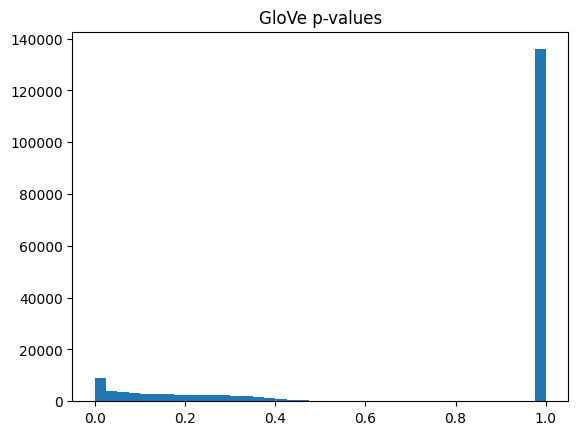

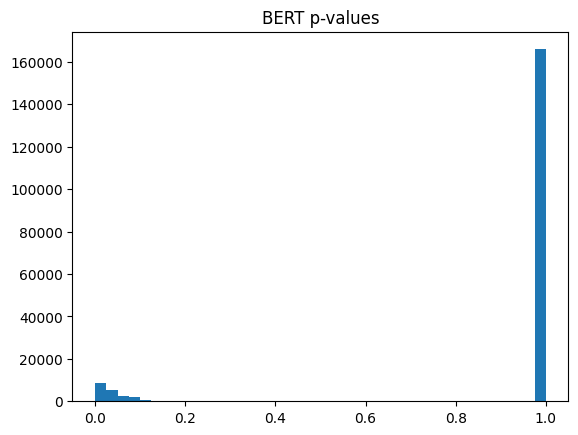

uncorrected p<0.001 | GloVe: 0
uncorrected p<0.001 | BERT : 0


In [20]:
import matplotlib.pyplot as plt
plt.figure(); plt.hist(p_glove[np.isfinite(p_glove)], bins=40, range=(0,1)); plt.title("GloVe p-values"); plt.show()
plt.figure(); plt.hist(p_bert[np.isfinite(p_bert)],  bins=40, range=(0,1)); plt.title("BERT p-values");  plt.show()

# כמה ווקסלים מתחת ל-0.001 לא מתוקן (לתחושת "יש סיגנל?")
print("uncorrected p<0.001 | GloVe:", int(np.sum(p_glove < 1e-3)))
print("uncorrected p<0.001 | BERT :", int(np.sum(p_bert  < 1e-3)))
